In [1]:
#Aplicação do DecisionTreeClassifier na base de dados de Doenças Cardíacas, considerando o atributo HighBP
#Carregando o conjunto de dados
import pandas as pd
arquivo = pd.read_csv('D:/UCPEL/IA-ML/heart.csv')

In [2]:
arquivo.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
arquivo.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
arquivo.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Separando as variáveis entre preditoras e variável-alvo
y = arquivo['output']
x = arquivo.drop('output', axis = 1)

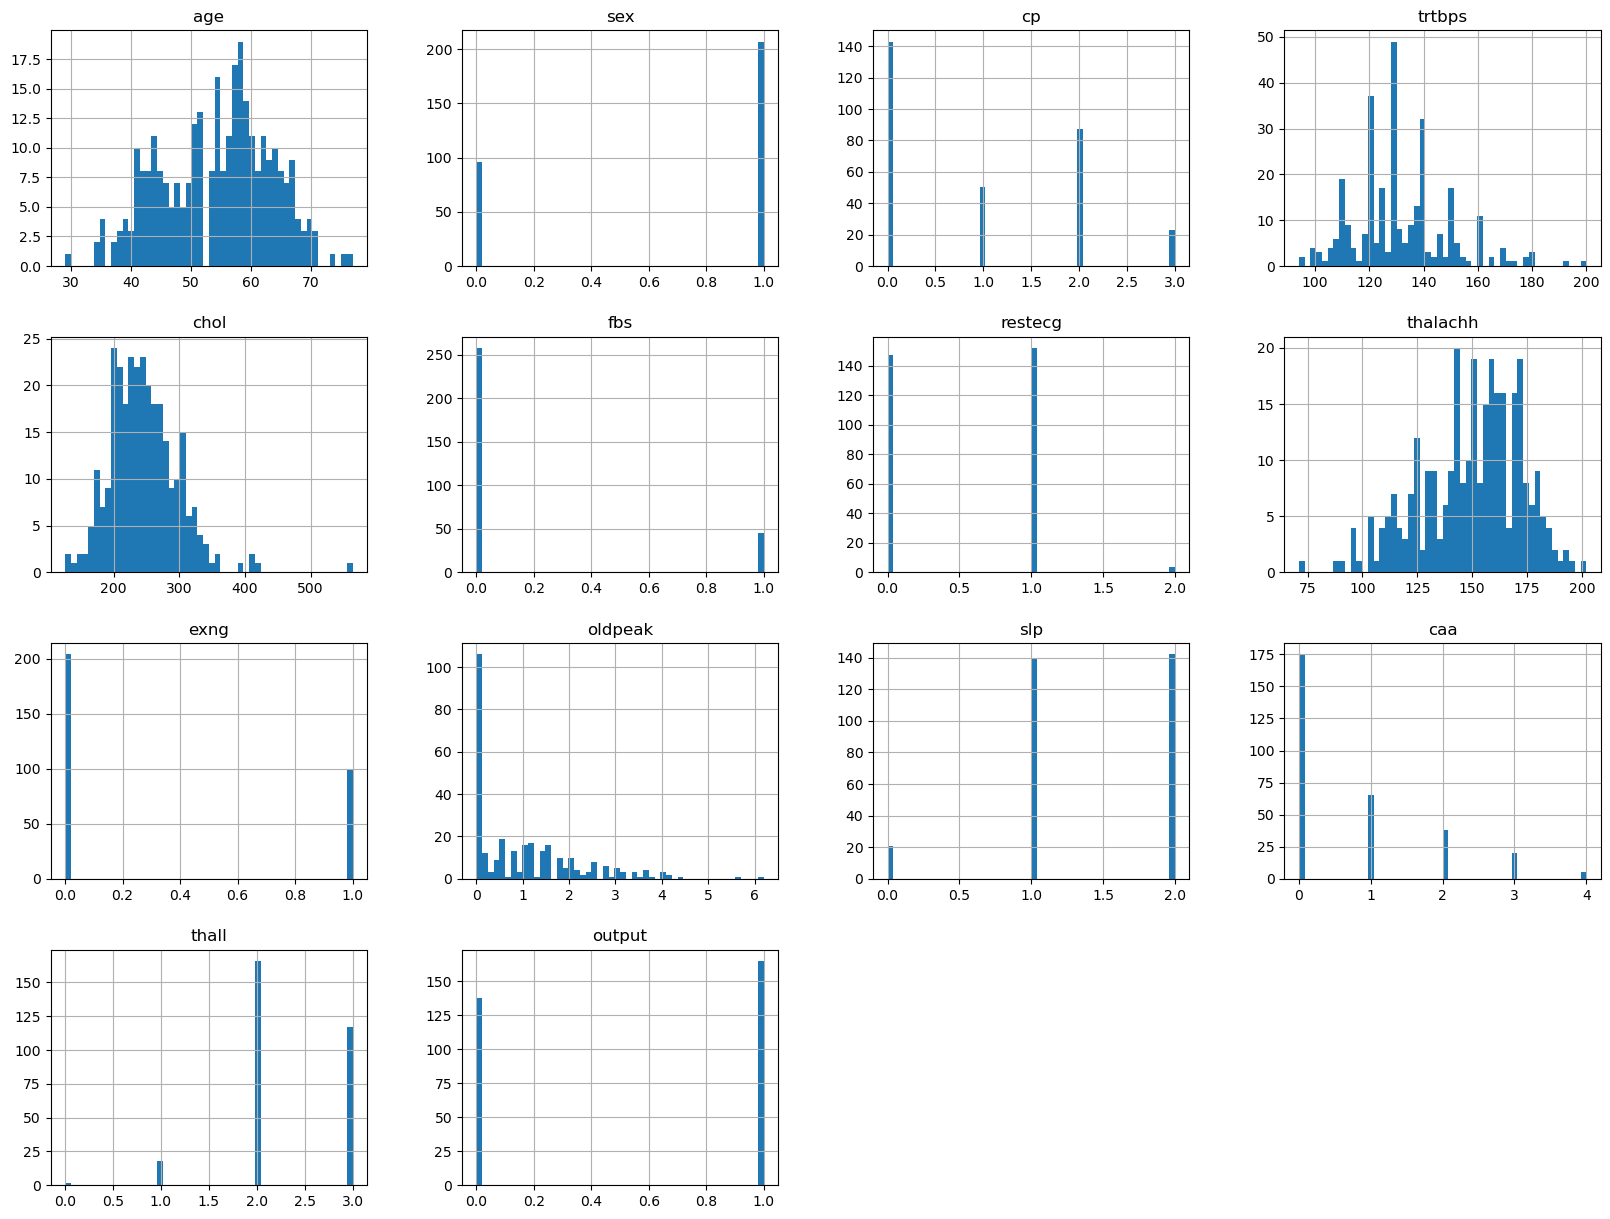

In [7]:
#utilizando o método hist
import matplotlib.pyplot as plt
arquivo.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#Criando um conjunto de testes
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(arquivo, 0.3)

In [10]:
len(train_set)

213

In [11]:
len(test_set)

90

In [12]:
#Cálculo do hash do identificador de cada instância 
#e adicionar a instância no conjunto de testes se o hash for menor ou igual a 20% do valor máximo dele.
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_, ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
#Aplicando o train test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(arquivo, test_size = 0.3, random_state = 42)

In [14]:
#Gerando a matriz de correlação
corr_matrix = arquivo.corr()

In [15]:
corr_matrix["output"].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='cp', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='fbs', ylabel='age'>,
        <AxesSubplot:xlabel='restecg', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='exng', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='slp', ylabel='age'>,
        <AxesSubplot:xlabel='caa', ylabel='age'>,
        <AxesSubplot:xlabel='thall', ylabel='age'>,
        <AxesSubplot:xlabel='output', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='cp', ylabel='sex'>,
        <AxesSubplot:xlabel='trtbps', ylabel='sex'>,
        <AxesSubplot:xlabel='chol', ylabel='sex'>,
        <AxesSubplot:xla

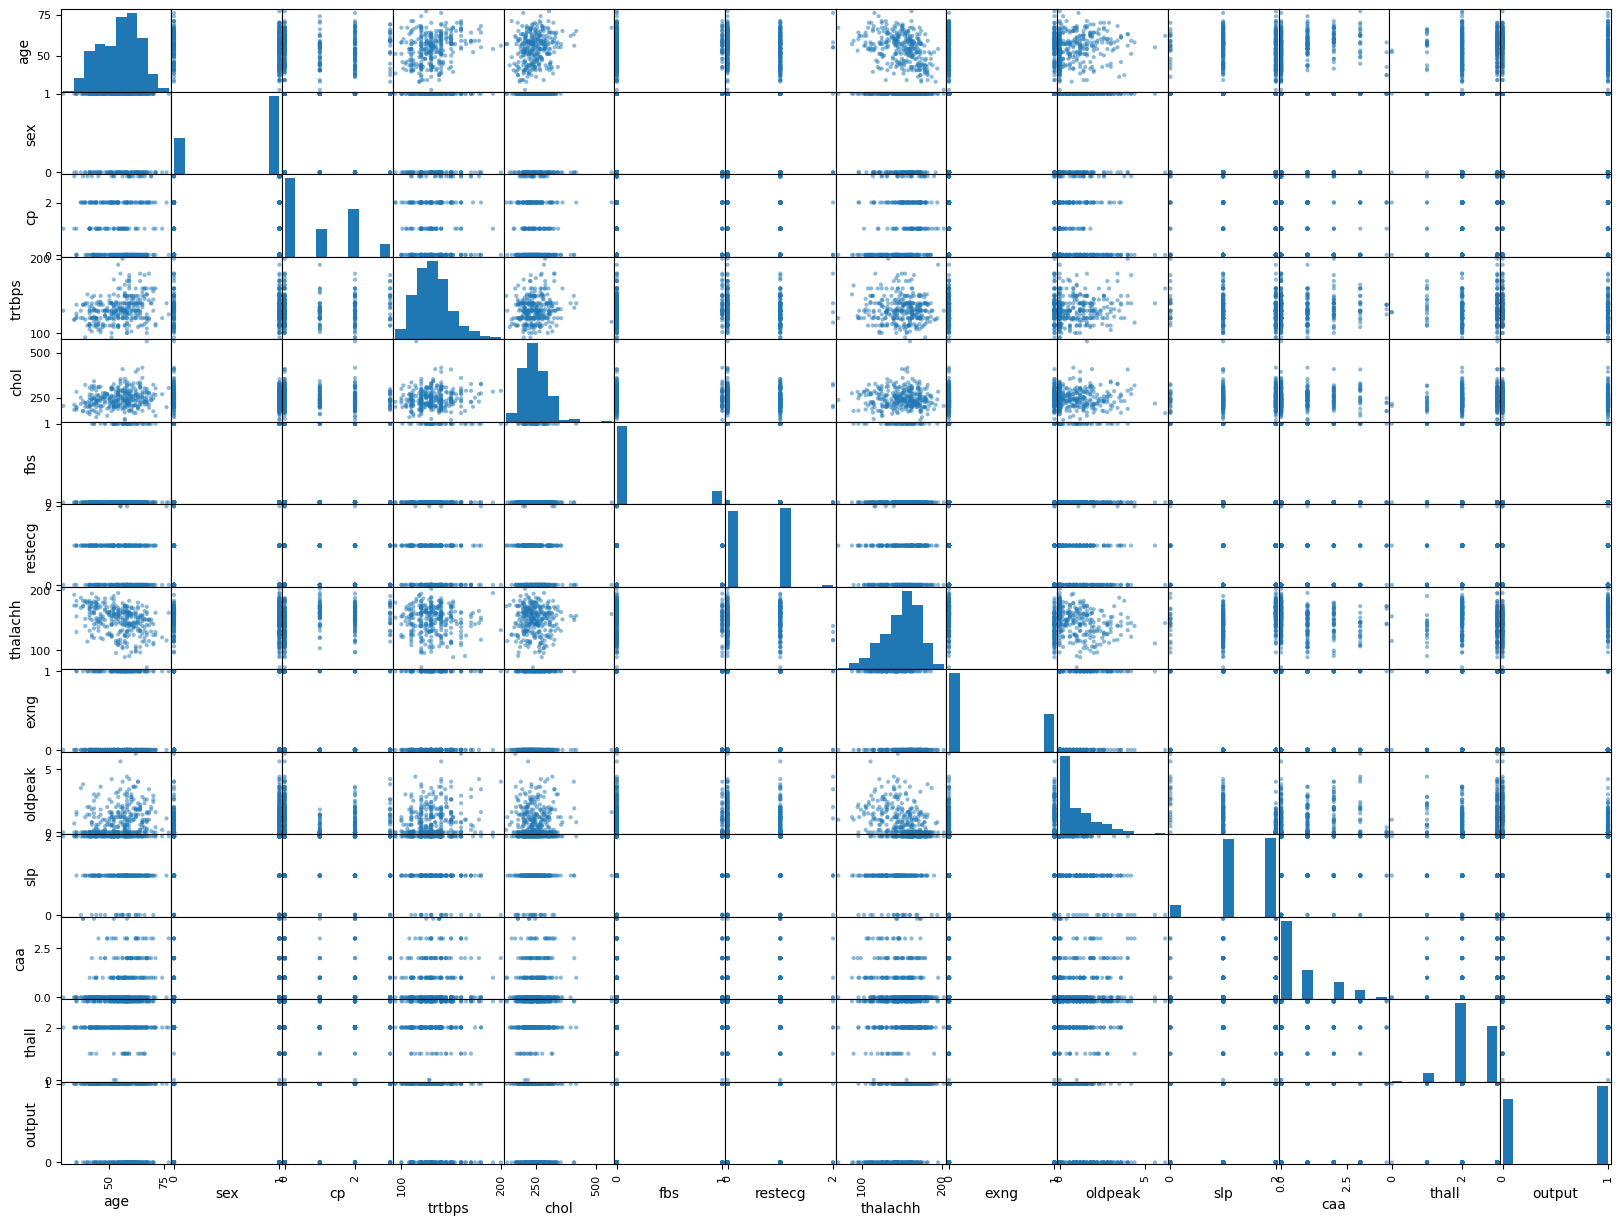

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall", "output"]
scatter_matrix(arquivo[attributes], figsize=(20,15))